In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("/Users/vallisisirasista/Downloads/Admission_Predict_Ver1.1.csv")
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
dataset.drop(['Serial No.'],axis=1,inplace=True)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [6]:
dataset.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<Axes: >

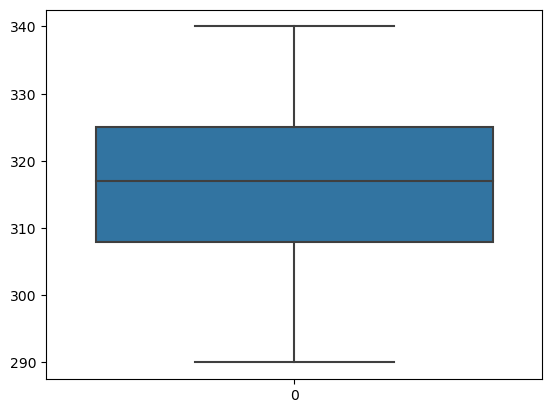

In [7]:
import seaborn as sns
sns.boxplot(dataset["GRE Score"])


<Axes: >

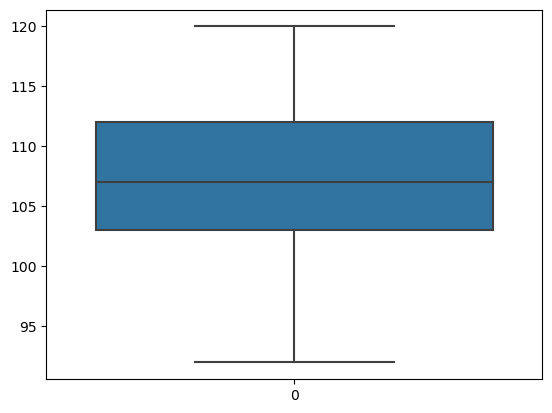

In [8]:
sns.boxplot(dataset["TOEFL Score"])

<Axes: >

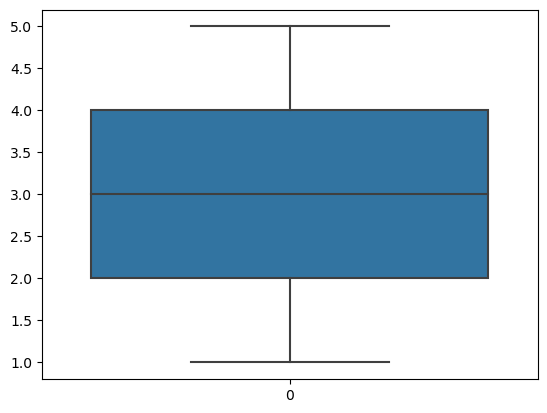

In [9]:
sns.boxplot(dataset["University Rating"])

<Axes: >

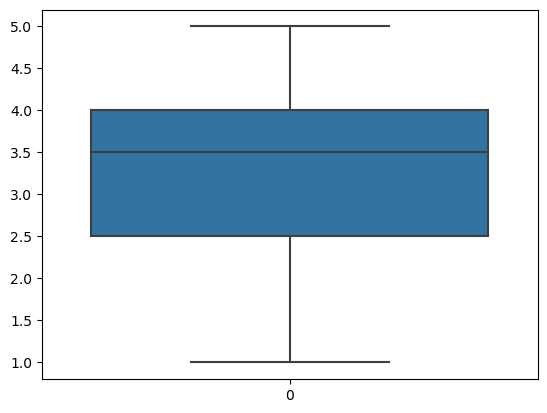

In [10]:
sns.boxplot(dataset["SOP"])

<Axes: >

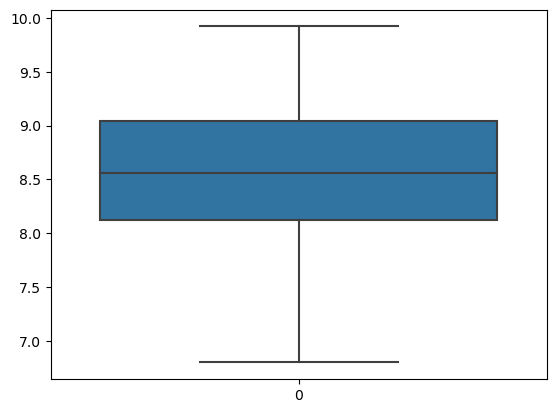

In [11]:
sns.boxplot(dataset["CGPA"])

<Axes: >

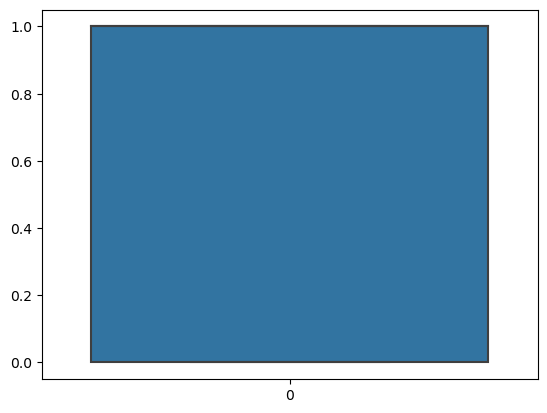

In [12]:
sns.boxplot(dataset["Research"])

<Axes: >

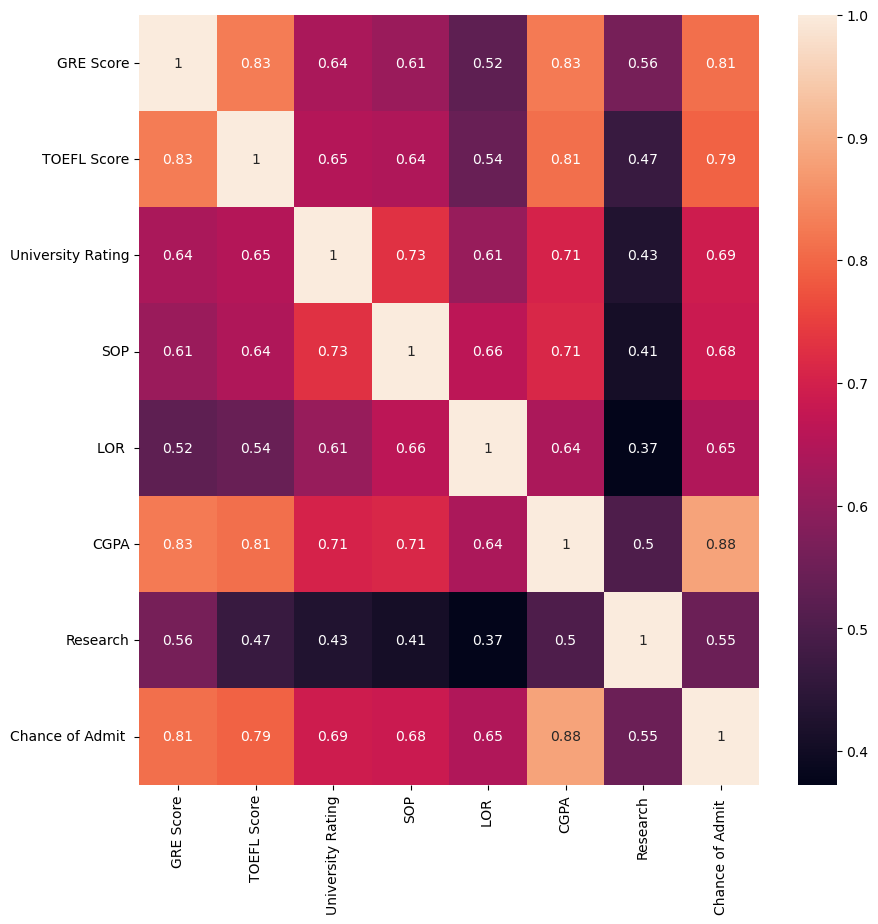

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.iloc[:,0:9].corr(),annot=True)

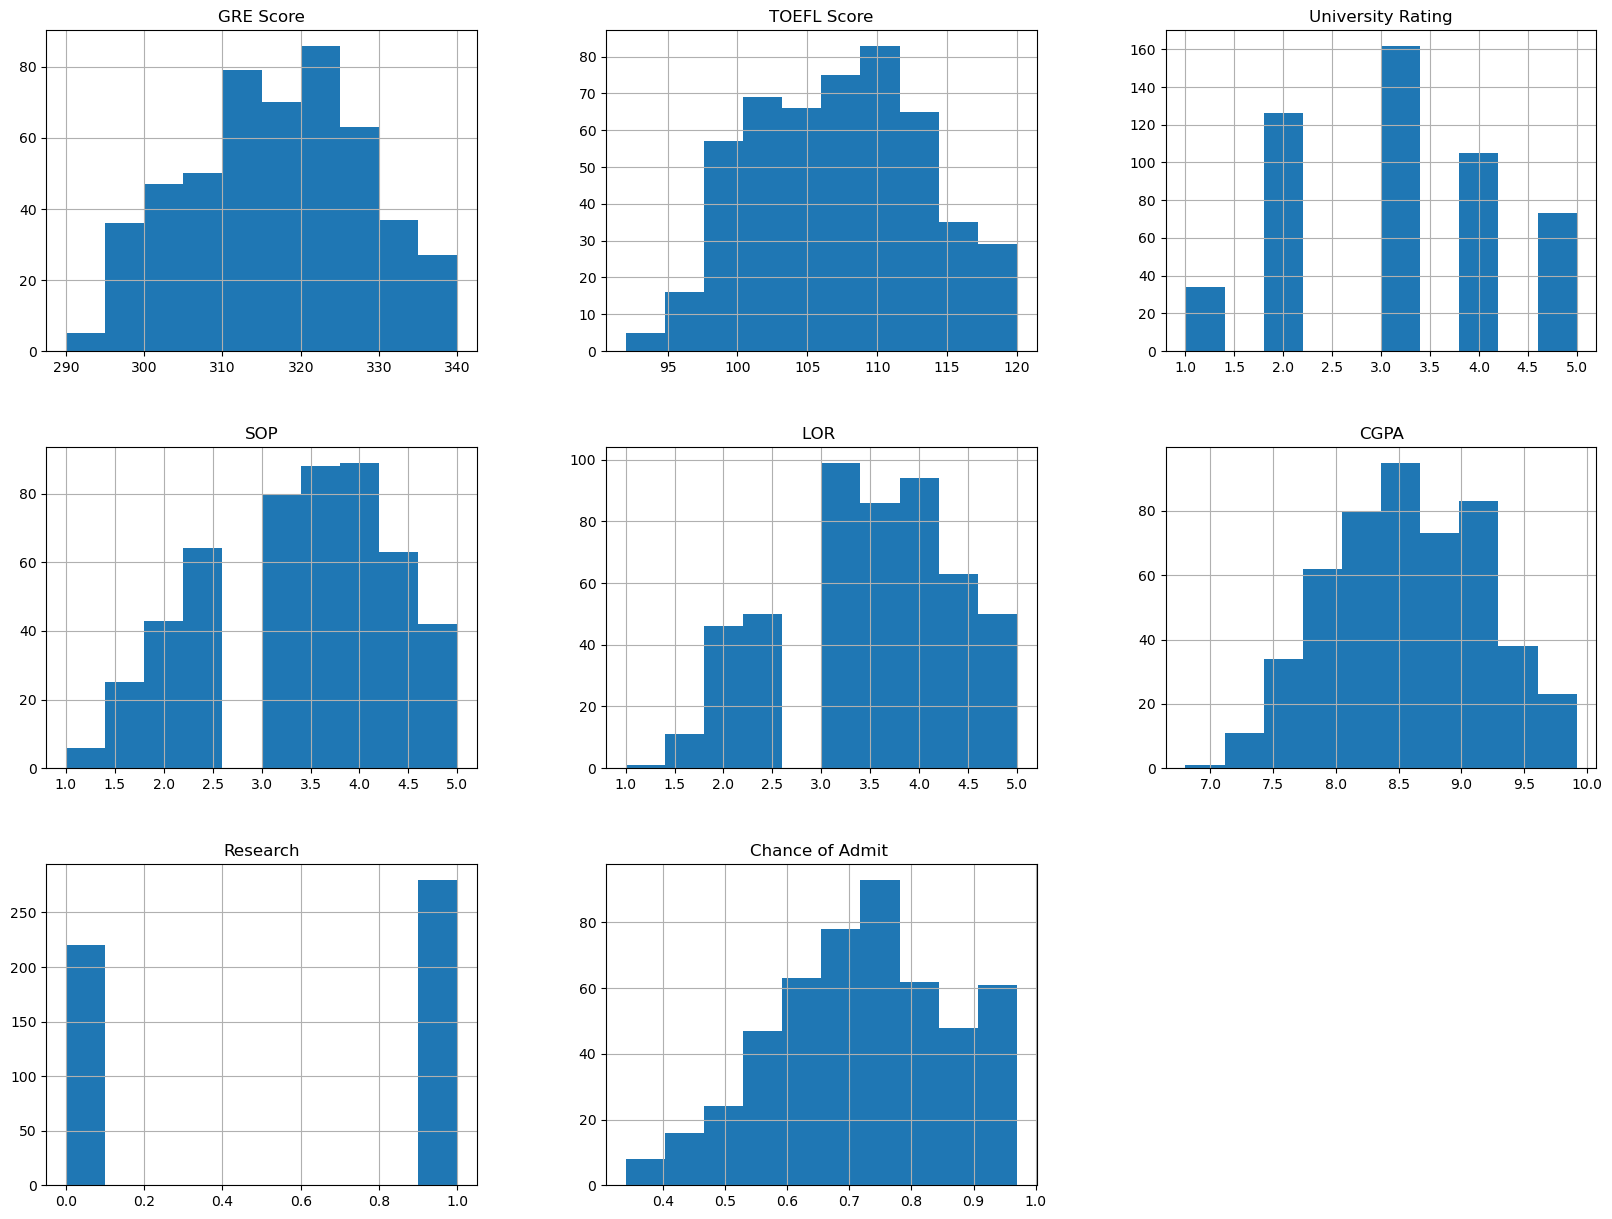

In [14]:
dataset.hist(bins=10, figsize=(20,15))
plt.show()

<Axes: xlabel='Research', ylabel='Chance of Admit '>

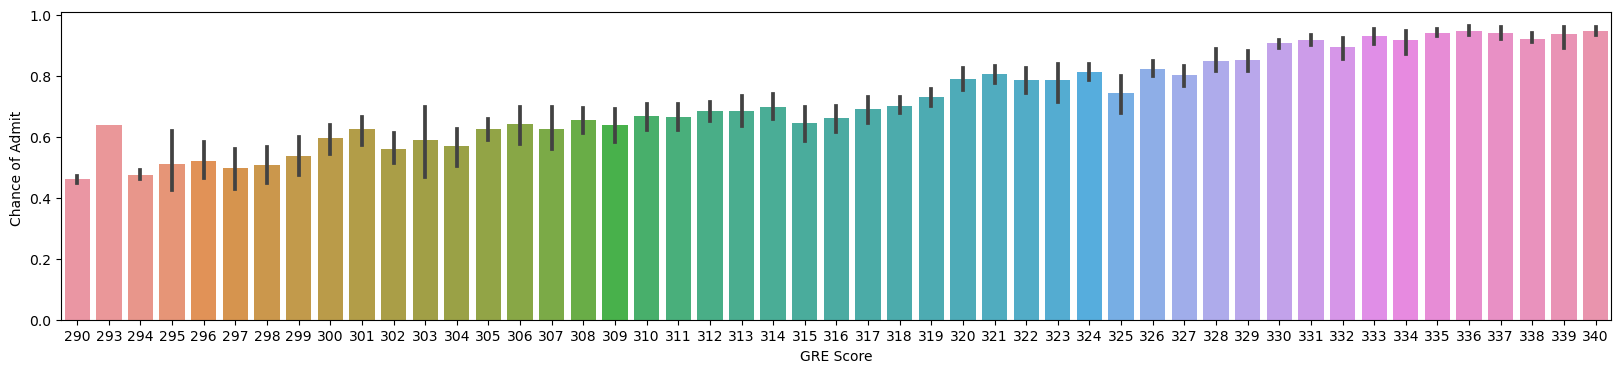

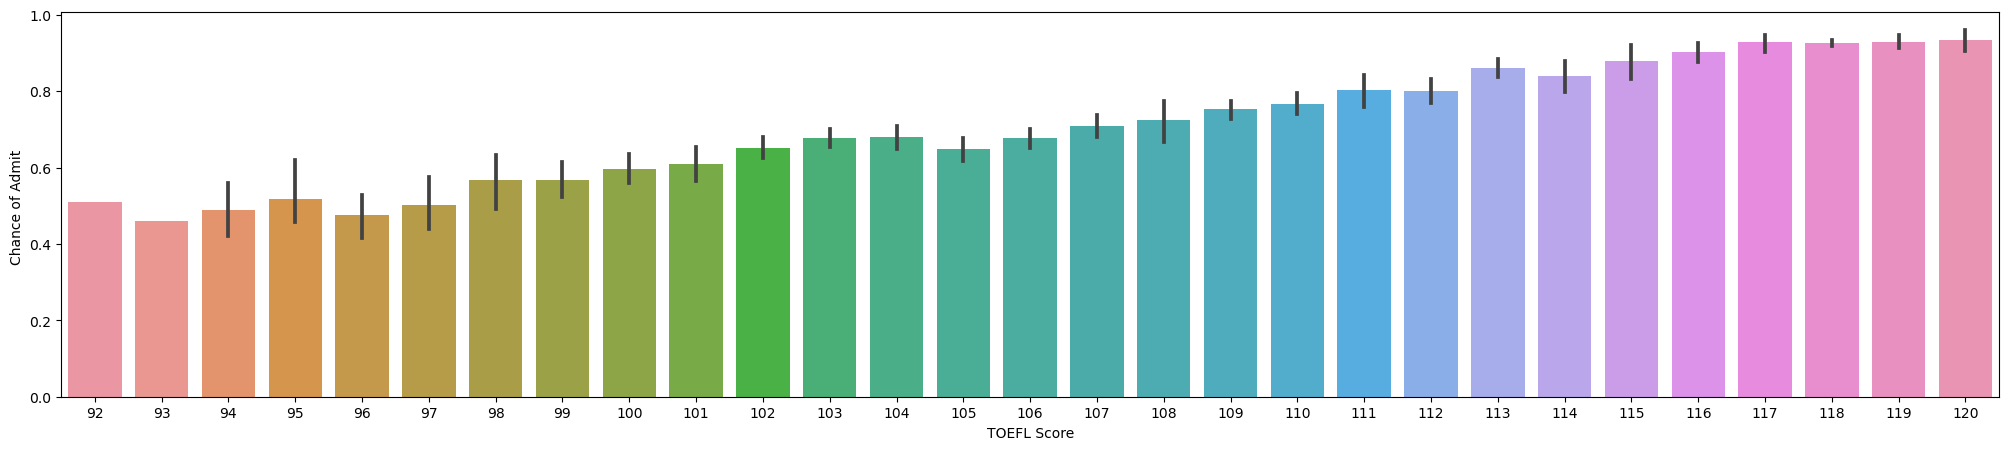

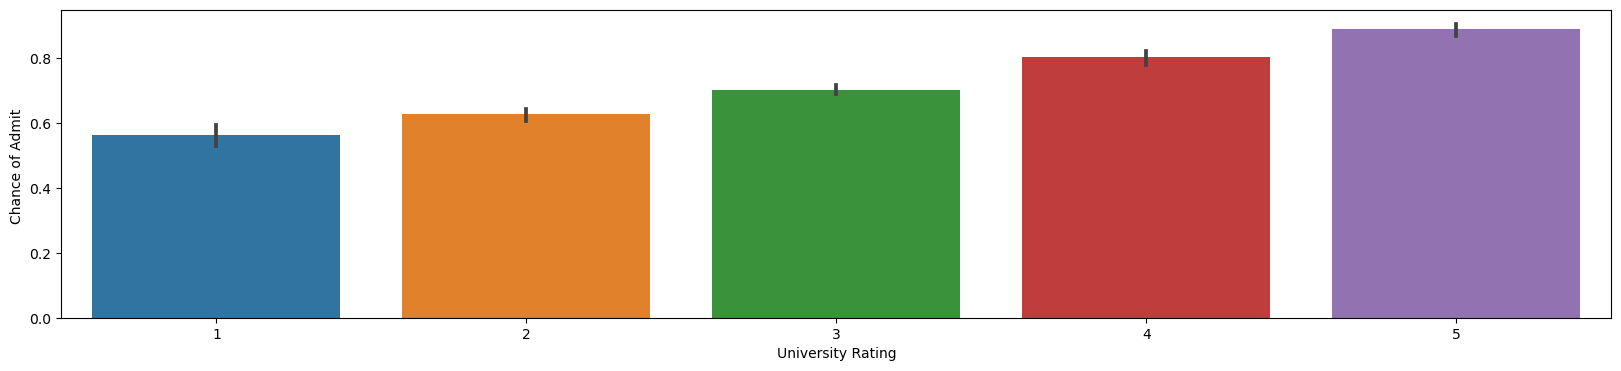

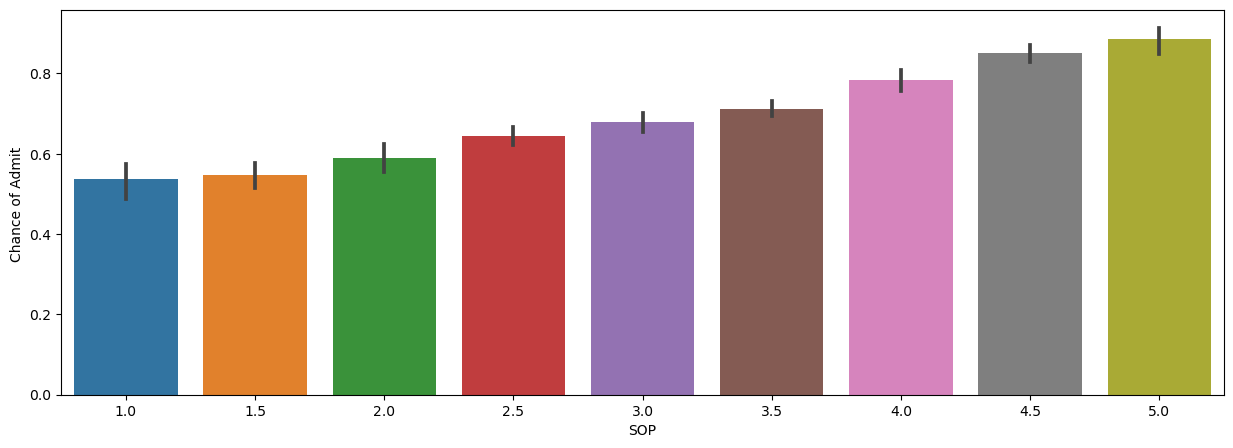

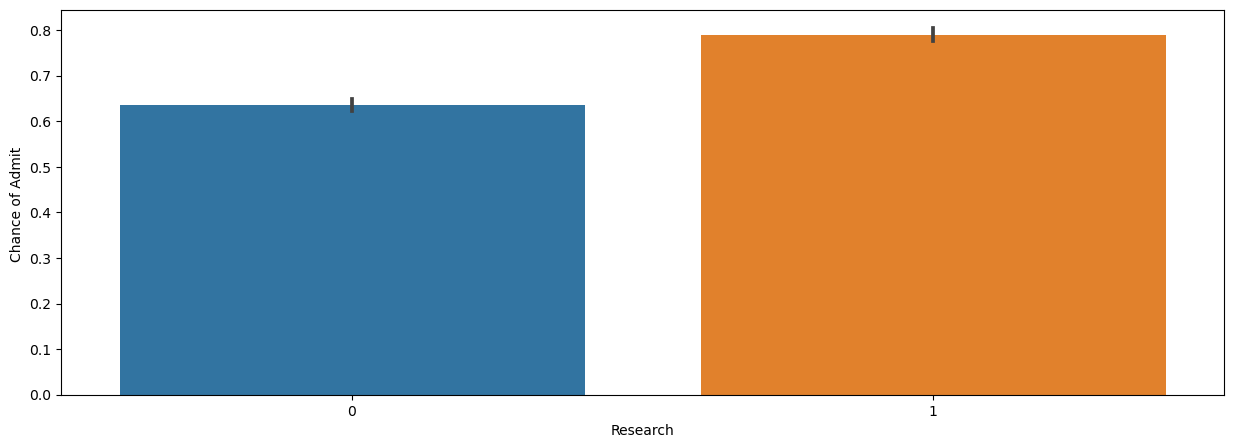

In [15]:
plt.subplots(figsize=(20,4))
sns.barplot(x="GRE Score",y="Chance of Admit ",data=dataset)
plt.subplots(figsize=(25,5))
sns.barplot(x="TOEFL Score",y="Chance of Admit ",data=dataset)
plt.subplots(figsize=(20,4))
sns.barplot(x="University Rating",y="Chance of Admit ",data=dataset)
plt.subplots(figsize=(15,5))
sns.barplot(x="SOP",y="Chance of Admit ",data=dataset)
plt.subplots(figsize=(15,5))
sns.barplot(x="Research",y="Chance of Admit ",data=dataset)

In [16]:
dataset.isnull().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [17]:
x = dataset.iloc[:,0:7].values
y = dataset.iloc[:,7:8].values

In [18]:
x.shape

(500, 7)

In [19]:
y.shape

(500, 1)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)

In [21]:
x_train.shape

(400, 7)

In [22]:
y_train.shape

(400, 1)

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred = regressor.predict(x_test)
y_pred

array([[0.62858489],
       [0.5630453 ],
       [0.62610849],
       [0.52278247],
       [0.50451666],
       [0.76156908],
       [0.90718643],
       [0.6458427 ],
       [0.5415052 ],
       [0.55657926],
       [0.96425939],
       [0.93686676],
       [0.78819729],
       [0.74752677],
       [0.77994022],
       [0.65097779],
       [0.77492475],
       [0.89655977],
       [0.66998219],
       [0.7928963 ],
       [0.67387898],
       [0.65227253],
       [0.68469348],
       [0.60918057],
       [0.65299459],
       [0.7319318 ],
       [0.7324281 ],
       [0.84755228],
       [0.68454267],
       [0.61497989],
       [0.99610597],
       [0.68451526],
       [0.86773922],
       [0.8851996 ],
       [0.55217387],
       [0.72482522],
       [0.9660184 ],
       [0.73846807],
       [0.96128332],
       [0.47471084],
       [0.95160397],
       [0.83413252],
       [0.69629798],
       [0.72724642],
       [0.80494755],
       [0.66388272],
       [0.74984219],
       [0.836

In [25]:
y_test

array([[0.73],
       [0.39],
       [0.64],
       [0.59],
       [0.49],
       [0.79],
       [0.9 ],
       [0.71],
       [0.51],
       [0.58],
       [0.95],
       [0.94],
       [0.81],
       [0.81],
       [0.76],
       [0.62],
       [0.78],
       [0.9 ],
       [0.7 ],
       [0.76],
       [0.74],
       [0.61],
       [0.53],
       [0.63],
       [0.64],
       [0.57],
       [0.79],
       [0.86],
       [0.71],
       [0.71],
       [0.97],
       [0.72],
       [0.89],
       [0.95],
       [0.5 ],
       [0.68],
       [0.96],
       [0.81],
       [0.94],
       [0.49],
       [0.94],
       [0.79],
       [0.74],
       [0.71],
       [0.76],
       [0.57],
       [0.7 ],
       [0.84],
       [0.43],
       [0.86],
       [0.82],
       [0.84],
       [0.67],
       [0.66],
       [0.61],
       [0.85],
       [0.75],
       [0.96],
       [0.42],
       [0.64],
       [0.65],
       [0.97],
       [0.79],
       [0.92],
       [0.6 ],
       [0.71],
       [0.

In [26]:
import pickle
pickle.dump(regressor,open('Chance of Admit.pkl','wb'))
model = pickle.load(open('Chance of Admit.pkl','rb'))


In [27]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_pred,y_test)

accuracy

0.8206313959741902

In [28]:
yp = regressor.predict([[337,118,4,4.5,4.5,9.65,1]])

yp

array([[0.95413103]])